# Парсинг данных (parsing) *vs* Скрейпинг, скрапинг (web-scraping) *vs* Краулинг (web-crawling)

**Web-scraping** - получение доступа к интересующей веб-странице и попытка извлечь из неё информацию для дальнейшего анализа. Обычно подразумевает автоматизацию, но может выполняться и вручную. Инструменты в Python: [requests](https://requests.readthedocs.io/en/latest/index.html), [beautifulsoup](https://beautiful-soup-4.readthedocs.io/en/latest/), [selenium](https://www.selenium.dev/selenium/docs/api/py/index.html).

Процедуру Web-скрейпинга можно разбить на два этапа:
1. отправка запроса на web-сайт и загрузка исходного кода страницы (requests/selenium);
2. извлечение содержимого web-страницы (beautifulsoup/selenium). 

**Веб-краулеры** действуют аналогичным образом. Поскольку анализируется каждая веб-страница сайта, анализируются и ссылки на каждой из страниц. Краулеры продолжают прочесывать ссылки, веб-страницы и текст. Попутно они индексируют эти страницы, чтобы лучше понять информацию на каждой странице. Поскольку в Интернете существуют миллиарды веб-сайтов, этот процесс продолжается бесконечно. Однако существуют правила, определяющие частоту просмотра сайтов, приоритетность сайтов и т.д.

**Парсинг** – это синтаксический анализ, разбор текста в синтаксическое дерево, в соответствии с формальной грамматикой ([lxml](https://lxml.de/)).


# Библиотека [BeautifulSoup](<https://www.crummy.com/software/BeautifulSoup/bs4/doc/>)


## Тестовый HTML

In [ ]:
test = '''
    <html>
        <head><title>Some title</title></head>
        <body>
            <div class="first_level">
                <h2 align='center'> Some text </h2>
                <h2 align='left'> Another text </h2>
            </div>
            <h2> Last <b>text</b> </h2>
        </body>
    </html>
'''

### Создание объекта ```BeautifulSoup```

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(test, 'html.parser')
soup


<html>
<head><title>Some title</title></head>
<body>
<div class="first_level">
<h2 align="center"> Some text </h2>
<h2 align="left"> Another text </h2>
</div>
<h2> Last <b>text</b> </h2>
</body>
</html>

### Базовые команды в Beautiful Soup для разбора HTML документа

In [ ]:
soup.title

<title>Some title</title>

In [ ]:
soup.title.name

'title'

In [ ]:
soup.title.string

'Some title'

In [ ]:
soup.title.parent.name

'head'

In [ ]:
soup.div

<div class="first_level">
<h2 align="center"> Some text </h2>
<h2 align="left"> Another text </h2>
</div>

In [ ]:
soup.div['class']

['first_level']

In [ ]:
soup.div.h2

<h2 align="center"> Some text </h2>

In [ ]:
soup.h2.string

' Some text '

In [ ]:
soup.find_all('h2')

[<h2 align="center"> Some text </h2>,
 <h2 align="left"> Another text </h2>,
 <h2> Last <b>text</b> </h2>]

In [ ]:
type(soup), type(soup.title), type(soup.div), type(soup.find_all('h2'))

(bs4.BeautifulSoup, bs4.element.Tag, bs4.element.Tag, bs4.element.ResultSet)

#### h2 теги с атрибутом align равным center

In [ ]:
soup.find_all("h2", align='center')

[<h2 align="center"> Some text </h2>]

#### h2 теги с атрибутом align

In [ ]:
soup.find_all('h2', align=True)

[<h2 align="center"> Some text </h2>, <h2 align="left"> Another text </h2>]

#### Текст в тегах

In [ ]:
list(soup.find_all('h2')[2].children)

[' Last ', <b>text</b>, ' ']

In [ ]:
s = list(soup.find_all('h2')[2].children)[0]
s

' Last '

In [ ]:
type(s)

bs4.element.NavigableString

In [ ]:
print(soup.get_text())



Some title


 Some text 
 Another text 

 Last text 





## Рассмотрим реальный HTML документ
В качестве примера возьмем статью из Википедии:  
<https://ru.wikipedia.org/wiki/Население_России>  
и распарсим таблицу:  
<img src="https://i.imgur.com/IApXkqV.png" height=500>

### Web-scraping

In [1]:
import requests

#### Отправляем GET запрос на web-сервер и загружаем HTML

In [2]:
SOURCE_LINK = "https://ru.wikipedia.org/wiki/Население_России"
response = requests.get(SOURCE_LINK)
response # response object

<Response [200]>

In [3]:
response.status_code

200

In [4]:
response.content

b'<!DOCTYPE html>\n<html class="client-nojs" lang="ru" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>\xd0\x9d\xd0\xb0\xd1\x81\xd0\xb5\xd0\xbb\xd0\xb5\xd0\xbd\xd0\xb8\xd0\xb5 \xd0\xa0\xd0\xbe\xd1\x81\xd1\x81\xd0\xb8\xd0\xb8 \xe2\x80\x94 \xd0\x92\xd0\xb8\xd0\xba\xd0\xb8\xd0\xbf\xd0\xb5\xd0\xb4\xd0\xb8\xd1\x8f</title>\n<script>document.documentElement.className="client-js";(function(){var cookie=document.cookie.match(/(?:^|; )ruwikimwclientprefs=([^;]+)/);if(cookie){var featureName=cookie[1];document.documentElement.className=document.documentElement.className.replace(featureName+\'-enabled\',featureName+\'-disabled\');}}());RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.","\xc2\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","\xd1\x8f\xd0\xbd\xd0\xb2\xd0\xb0\xd1\x80\xd1\x8c","\xd1\x84\xd0\xb5\xd0\xb2\xd1\x80\xd0\xb0\xd0\xbb\xd1\x8c","\xd0\xbc\xd0\xb0\xd1\x80\xd1\x82","\xd0\xb0\xd0\xbf\xd1\x80\xd0\xb5\xd0\xbb\xd1\x8c","\xd0\

In [5]:
response.text

'<!DOCTYPE html>\n<html class="client-nojs" lang="ru" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Население России — Википедия</title>\n<script>document.documentElement.className="client-js";(function(){var cookie=document.cookie.match(/(?:^|; )ruwikimwclientprefs=([^;]+)/);if(cookie){var featureName=cookie[1];document.documentElement.className=document.documentElement.className.replace(featureName+\'-enabled\',featureName+\'-disabled\');}}());RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.","\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","январь","февраль","март","апрель","май","июнь","июль","август","сентябрь","октябрь","ноябрь","декабрь"],"wgRequestId":"9d64d3ca-d13f-446e-8c8c-77b8453f13df","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Население_России","wgTitle":"Население России","wgCurRevisionId":129600443,"wgRevisionId":129600443,"wgArticleId

### Парсим полученный HTML

In [6]:
from bs4 import BeautifulSoup
import pandas as pd
import re

In [7]:
html_soup = BeautifulSoup(response.content, 'html.parser')

In [8]:
print(html_soup.prettify()[:200])

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="ru">
 <head>
  <meta charset="utf-8"/>
  <title>
   Население России — Википедия
  </title>
  <script>
   document.documentElement.className="


In [9]:
tables = html_soup.find_all('table', class_ = 'standard')
print(type(tables))
print(len(tables))

<class 'bs4.element.ResultSet'>
5


Нужная нам таблица находится в этом списке под индексом 0:
<img src="https://i.imgur.com/IApXkqV.png" height=500>

In [10]:
table_we_want = tables[0]
print(table_we_want.prettify())

<table class="standard">
 <tbody>
  <tr>
   <th colspan="8" scope="colgroup">
    Численность населения
   </th>
  </tr>
  <tr class="bright">
   <th scope="col">
    1897
    <sup class="reference" id="cite_ref-2010AX_22-0">
     <a href="#cite_note-2010AX-22">
      [22]
     </a>
    </sup>
   </th>
   <th scope="col">
    1926
    <sup class="reference" id="cite_ref-1926W_23-0">
     <a href="#cite_note-1926W-23">
      [23]
     </a>
    </sup>
   </th>
   <th scope="col">
    1928
    <sup class="reference" id="cite_ref-1928A_24-0">
     <a href="#cite_note-1928A-24">
      [24]
     </a>
    </sup>
   </th>
   <th scope="col">
    1937
    <sup class="reference" id="cite_ref-2010AX_22-1">
     <a href="#cite_note-2010AX-22">
      [22]
     </a>
    </sup>
   </th>
   <th scope="col">
    1939
    <sup class="reference" id="cite_ref-2010AX_22-2">
     <a href="#cite_note-2010AX-22">
      [22]
     </a>
    </sup>
   </th>
   <th scope="col">
    1940
    <sup class="reference" 

#### Извлекаем информацию из таблицы

In [11]:
children = table_we_want.findChildren("tr")
for child in children:
    print(child)

<tr><th colspan="8" scope="colgroup">Численность населения</th></tr>
<tr class="bright"><th scope="col">1897<sup class="reference" id="cite_ref-2010AX_22-0"><a href="#cite_note-2010AX-22">[22]</a></sup></th><th scope="col">1926<sup class="reference" id="cite_ref-1926W_23-0"><a href="#cite_note-1926W-23">[23]</a></sup></th><th scope="col">1928<sup class="reference" id="cite_ref-1928A_24-0"><a href="#cite_note-1928A-24">[24]</a></sup></th><th scope="col">1937<sup class="reference" id="cite_ref-2010AX_22-1"><a href="#cite_note-2010AX-22">[22]</a></sup></th><th scope="col">1939<sup class="reference" id="cite_ref-2010AX_22-2"><a href="#cite_note-2010AX-22">[22]</a></sup></th><th scope="col">1940<sup class="reference" id="cite_ref-2015CR_25-0"><a href="#cite_note-2015CR-25">[25]</a></sup></th><th scope="col">1941<sup class="reference" id="cite_ref-2015CR_25-1"><a href="#cite_note-2015CR-25">[25]</a></sup></th><th scope="col">1946<sup class="reference" id="cite_ref-2015CR_25-2"><a href="#cite

1-ая строка:
```html
<tr class="bright">
  <th scope="col">1897
    <sup class="reference" id="cite_ref-2010AX_36-0">
      <a href="#cite_note-2010AX-36">[36]</a>
    </sup>
  </th>
  <th scope="col">1926
    <sup class="reference" id="cite_ref-1926W_37-0">
      <a href="#cite_note-1926W-37">[37]</a>
    </sup>
  </th>
  <th scope="col">1928
    <sup class="reference" id="cite_ref-1928A_38-0">
      <a href="#cite_note-1928A-38">[38]</a>
    </sup>
  </th>
  <th scope="col">1937
    <sup class="reference" id="cite_ref-2010AX_36-1">
      <a href="#cite_note-2010AX-36">[36]</a>
    </sup>
  </th>
  <th scope="col">1939
    <sup class="reference" id="cite_ref-2010AX_36-2">
      <a href="#cite_note-2010AX-36">[36]</a>
    </sup>
  </th>
  <th scope="col">1940
    <sup class="reference" id="cite_ref-2015CR_39-0">
      <a href="#cite_note-2015CR-39">[39]</a>
    </sup>
  </th>
  <th scope="col">1941
    <sup class="reference" id="cite_ref-2015CR_39-1">
      <a href="#cite_note-2015CR-39">[39]</a>
    </sup>
  </th>
  <th scope="col">1946
    <sup class="reference" id="cite_ref-2015CR_39-2">
      <a href="#cite_note-2015CR-39">[39]</a>
    </sup>
  </th>
</tr>
```

In [14]:
data = {'year': [], 'population': []}

children = table_we_want.findChildren("tr")
for child in children:
  for subchild in child:
    if subchild.name == "th":
        raw_year = subchild.text
        # print('raw_year: ', raw_year)
        raw_year = re.sub('\[\d+\]', '', raw_year)
        try:
            raw_year = int(raw_year)
        except ValueError:
            continue
        data['year'].append(raw_year)
    elif subchild.name == 'td':
        ascii_number = subchild.text
        # print(ascii_number)
        try:
            normal_number = int(re.sub('\\xa0|\D+', '', ascii_number))
            # print(normal_number)
            data['population'].append(normal_number)
        except ValueError:
            continue
print(data)

{'year': [1897, 1926, 1928, 1937, 1939, 1940, 1941, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], 'population': [67473000, 100891244, 103185200, 104932000, 108377000, 110098000, 110988000, 97547000, 98509000, 99159000, 100252000, 102067000, 102945000, 104587000, 106715000, 108430000, 110537000, 112266000, 114017000, 115665000, 117534315, 119045800, 120765599, 122406795, 123848406, 125179206, 126309100, 127189098, 128026196, 128695994, 129378809, 130079210, 130563363, 131304497, 132069024, 132799355, 133633900, 134549101, 135503754, 136455076, 137550949, 138126600, 138839

In [15]:
result_df = pd.DataFrame.from_dict(data)
print(result_df)
print(result_df.info())
print(result_df.describe())
print(result_df.median())
print(result_df['population'].mode()[0])   # index 1 gives the next mode (ie, 2)

    year  population
0   1897    67473000
1   1926   100891244
2   1928   103185200
3   1937   104932000
4   1939   108377000
..   ...         ...
80  2019   146780720
81  2020   146748590
82  2021   147182123
83  2022   146980061
84  2023   146424729

[85 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   year        85 non-null     int64
 1   population  85 non-null     int64
dtypes: int64(2)
memory usage: 1.5 KB
None
              year    population
count    85.000000  8.500000e+01
mean   1979.988235  1.313200e+08
std      26.788188  1.770540e+07
min    1897.000000  6.747300e+07
25%    1960.000000  1.190458e+08
50%    1981.000000  1.388392e+08
75%    2002.000000  1.462673e+08
max    2023.000000  1.485617e+08
year               1981.0
population    138839197.0
dtype: float64
67473000


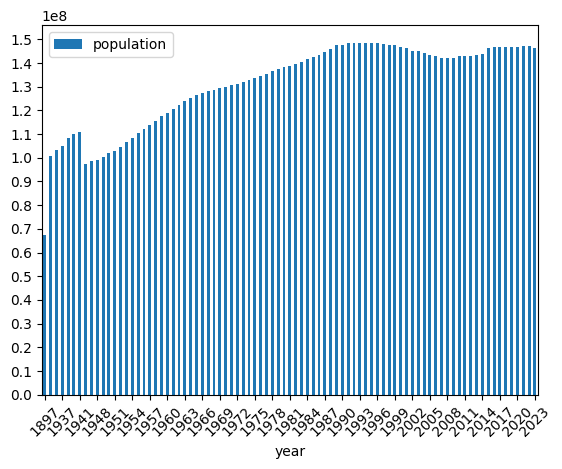

In [16]:
import matplotlib.pyplot as plt

result_df.plot(kind='bar', x='year', y='population', rot=45)
plt.locator_params(nbins=30)

In [17]:
print("Save df to csv...")
result_df.to_csv("russia_population.csv")
print("Ok!")

Save df to csv...
Ok!


In [ ]:
df = pd.read_csv('russia_population.csv', index_col=0)
df

,year,population
0,1897,67473000
1,1926,100891244
2,1928,103185200
3,1937,104932000
4,1939,108377000
...,...,...
80,2019,146780720
81,2020,146748590
82,2021,147182123
83,2022,146980061


### Итог:
Получили доступ к данным, собрали и привели в пригодный формат для дальнейшего анализа.

## Домашнее задание

Перейти по ссылке https://ru.wikipedia.org/wiki/Население_России и спарсить эту таблицу в датафрейм Pandas:

![](https://i.imgur.com/SubEFtQ.png)

**Провести анализ данных и ответить на вопросы:**
1. Есть ли какая-то зависимость между рождаемостью и смертностью (в городах)?
2. Как по годам менялись смертность, рождаемость и прирост среди городского и сельского населения (*построить демонстрирующие графики, отражающие эту динамику*)?
3. Сильно ли влияет смертность на естественный прирост в городах? А в сельской местности?
4. Можно ли выделить группы лет, в которых смертность в городах имела близкие значения? А рождаемость (*провести кластеризацию, подобрав подходящий алгоритм для этих данных*)? Если да, то с какими событиями это могло быть связано? Может быть, наблюдается какая-то периодичность?

**Документация:**
* beautifulsoup: https://pythonru.com/biblioteki/parsing-na-python-s-beautiful-soup